In [105]:
import pandas as pd
import plotly.express as px
import os
import datetime
from dateutil.relativedelta import relativedelta
import calendar

import plotly.io as pio
#https://www.geeksforgeeks.org/python-plotly-exporting-to-static-images/

In [106]:
is_py=False

In [107]:
# 31Dec21 - 22May22  (last day of prev month - current date)
# Export data from amibroker as format  D:\AB_DB\AB-Template & Explore\TopN_ROC_XPeriod.apx  
# Ticker,Date/Time,open,high,low,close,name,volume
# AVAX,31/12/2021 00:00:00,101.75,111.99,100.13,109.43,,2472910.50
# AVAX,1/1/2022 00:00:00,109.43,114.50,108.42,114.13,,1211128.00

#Amibroker script 
# Filter=1; 
# AddColumn(O,"open"); 
# AddColumn(H,"high"); 
# AddColumn(L,"low"); 
# AddColumn(C,"close"); 
# AddTextColumn(FullName(),"name");
# AddColumn(V,"volume"); 



In [112]:
# root_path=r'D:\JupyterCode\MyQuantFinProject\Data\ThaiFund\TH_All'
root_path=r'D:\JupyterCode\MyQuantFinProject\Data'
result_path='D:\JupyterCode\MyQuantFinProject\Report'

# file_name='China_Nov20-Mar21.csv'
file_name='Asia_Oct21-May22.csv'
title=file_name.replace('.csv','')
print(file_name," : ",title)

#title=''

# since the end calculate since x 
to_month_str='2022-05'

# Whick time frame   and look past in the past x month
timeframe='M'
past_month=8

#timeframe='W'
#past_week=8

required_fullname=False

today=datetime.datetime.today()
print(today)




Asia_Oct21-May22.csv  :  Asia_Oct21-May22
2022-05-29 22:17:32.158224


#Enter data

if is_py:
    print("Enter Timeframe (m or w)")
    timeframe = input("Enter TimeFrame : ")
    timeframe=timeframe.upper()

    print("Enter To Date asY-m (2022-03)")
    end_param = input("Enter end : ")



    try:
        start_dt=datetime.strptime(start, "%Y.%m.%d")
        end_dt=datetime.strptime(end,"%Y.%m.%d")
        if start_dt>=end_dt:
           raise Exception(f"Error : {start_dt} can't be greater or equal to {end_dt}")
    except Exception as ex:
        raise ex



    print(f"Do you want to retrive data from {start_dt} to {end_dt} ?")
    press_y=input(f"Press y=True and n=False : ") 
    if press_y.lower()=='y':
     ok=True
    else:
     exit()
else: 
    start='2017.01.01'
    end= today_now.strftime("%Y.%m.%d")
    
print(f"{start} - {end}")

In [113]:
print(to_month_str)
split_end_to=to_month_str.split('-')
print(split_end_to)
if  len(split_end_to)==2:
 range_month=calendar.monthrange(int(split_end_to[0]), int(split_end_to[1]))
 print(range_month)
else:
 raise Exception("Need format  '2021-12' ")   
    



2022-05
['2022', '05']
(6, 31)


In [114]:
to_month_firstDate=datetime.datetime( int(split_end_to[0]), int(split_end_to[1]) ,1 )
to_month_lastDate=datetime.datetime( int(split_end_to[0]), int(split_end_to[1]) ,range_month[1] )

print(to_month_firstDate)
print(to_month_lastDate)

2022-05-01 00:00:00
2022-05-31 00:00:00


In [115]:
if timeframe=='M':
    from_month=to_month_firstDate  + relativedelta(months=-past_month)
    from_month_str=from_month.strftime('%Y-%m')
    
    to_month_str=to_month_firstDate.strftime('%Y-%m')
    
    
elif timeframe=='W':
    if today<to_month_lastDate:
      from_month=today  + relativedelta(weeks=-(past_week+1))
      to_month_str=today.strftime('%Y-%m-%d')
    else: 
      from_month=to_month_lastDate  + relativedelta(weeks=-past_week)  
      to_month_str=to_month_lastDate.strftime('%Y-%m-%d')
    
    from_month_str=from_month.strftime('%Y-%m-%d')
     

print(f"look back in the  { past_month }+1(Including current month)  {timeframe } : {from_month_str} - {to_month_str}")   

look back in the  8+1(Including current month)  M : 2021-09 - 2022-05


In [116]:
# create directory
folder_report=f'{title}_{timeframe }_{from_month_str}_{to_month_str}'
report_path=result_path+"\\"+folder_report

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path) 
     print(report_path)   
     
except OSError as error:  
    raise error

D:\JupyterCode\MyQuantFinProject\Report\Asia_Oct21-May22_M_2021-09_2022-05


In [117]:
dfAll=pd.read_csv(f'{root_path}\\{file_name}',index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
# dfAll=pd.read_csv(f'{root_path}\\{file_name}',index_col='Date/Time')
dfAll.index.rename('datetime',inplace=True)
print(dfAll.info())

print(dfAll.head())
print(dfAll.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 663 entries, 2021-09-27 to 2022-05-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  663 non-null    object 
 1   open    663 non-null    float64
 2   high    663 non-null    float64
 3   low     663 non-null    float64
 4   close   663 non-null    float64
 5   volume  663 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.3+ KB
None
             Ticker   open   high    low  close      volume
datetime                                                   
2021-09-27  2822.HK  17.30  17.84  17.30  17.67  12953144.0
2021-09-28  2822.HK  17.68  17.86  17.56  17.68  11684440.0
2021-09-29  2822.HK  17.56  17.82  17.41  17.72  15227870.0
2021-09-30  2822.HK  17.68  17.81  17.64  17.71  15682391.0
2021-10-04  2822.HK  17.48  17.48  17.25  17.35  15547302.0
           Ticker   open   high    low  close      volume
datetime                                     

In [118]:


df=dfAll.loc[from_month_str:to_month_str,:]

df.rename(columns={'Ticker':'symbol'},inplace=True)


if required_fullname==True: 
 df=df[['symbol','name','close']]   
 df['symbol'] = df.apply( lambda x: f'{x["symbol"]} {x["name"]}'  , axis=1) 
else:
 df=df[['symbol','close']]   
    

print(df.info())

if  df.empty:
    print("No data according to your timeframe.")
    print("The belows is last record.")
    print( dfAll.iloc[len(dfAll)-1,:])
    exit()
    
else:   
    dfAll=None
    
print(df.head())
print(df.tail())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 663 entries, 2021-09-27 to 2022-05-27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  663 non-null    object 
 1   close   663 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.5+ KB
None
             symbol  close
datetime                  
2021-09-27  2822.HK  17.67
2021-09-28  2822.HK  17.68
2021-09-29  2822.HK  17.72
2021-09-30  2822.HK  17.71
2021-10-04  2822.HK  17.35
           symbol  close
datetime                
2022-05-23    EEM  41.45
2022-05-24    EEM  40.73
2022-05-25    EEM  40.93
2022-05-26    EEM  41.57
2022-05-27    EEM  42.05


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_17084\569249442.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [119]:
last_record=df.index[len(df)-1]
last_record_str=last_record.strftime('%d-%m-%Y')
print("Last Day : ",last_record_str)


list_symbol=df['symbol'].unique().tolist()
print(list_symbol)

# list_symbol=['AVAX','ETH','SOL']

df_Monthly_Price=pd.DataFrame(columns=['symbol','month-year','pct_change'])

Last Day :  27-05-2022
['2822.HK', '82823.HK', 'AAXJ', 'EEM']


In [120]:
for symbol in list_symbol:
    
    dfx_symbol=df.query('symbol==@symbol')
    
    dfx_month = dfx_symbol.resample(timeframe).last()
    dfx_month=dfx_month .reset_index()
    
    dfx_month['pct_change']=dfx_month['close'].pct_change()*100
    dfx_month['pct_change']=dfx_month['pct_change'].round(1)

    if timeframe=='M':
     dfx_month['month-year']=dfx_month['datetime'].apply( lambda x: x.strftime('%m-%Y') )
    elif timeframe=='W':
     dfx_month['month-year']=dfx_month['datetime'].apply( lambda x: x.strftime('%d-%m-%Y') )  
     dfx_month.loc[len(dfx_month)-1,'month-year']=last_record_str
        

    dfx_month=dfx_month[['symbol','month-year','close','pct_change']]
    
    dfx_month=dfx_month.dropna()
    dfx_month=dfx_month.drop(columns=['close'])
    
    
    df_Monthly_Price=pd.concat([df_Monthly_Price, dfx_month], ignore_index=True)
    
    print(dfx_month)
    


    symbol month-year  pct_change
1  2822.HK    10-2021         3.3
2  2822.HK    11-2021        -2.5
3  2822.HK    12-2021        -0.2
4  2822.HK    01-2022        -5.6
5  2822.HK    02-2022         0.7
6  2822.HK    03-2022        -7.2
7  2822.HK    04-2022        -5.5
8  2822.HK    05-2022        -3.7
     symbol month-year  pct_change
1  82823.HK    10-2021         2.3
2  82823.HK    11-2021        -2.9
3  82823.HK    12-2021         0.4
4  82823.HK    01-2022        -5.6
5  82823.HK    02-2022        -0.4
6  82823.HK    03-2022        -6.6
7  82823.HK    04-2022        -1.5
8  82823.HK    05-2022        -2.0
  symbol month-year  pct_change
1   AAXJ    10-2021         1.6
2   AAXJ    11-2021        -3.5
3   AAXJ    12-2021        -0.7
4   AAXJ    01-2022        -1.3
5   AAXJ    02-2022        -3.7
6   AAXJ    03-2022        -4.6
7   AAXJ    04-2022        -5.5
8   AAXJ    05-2022        -0.5
  symbol month-year  pct_change
1    EEM    10-2021         1.1
2    EEM    11-2021        

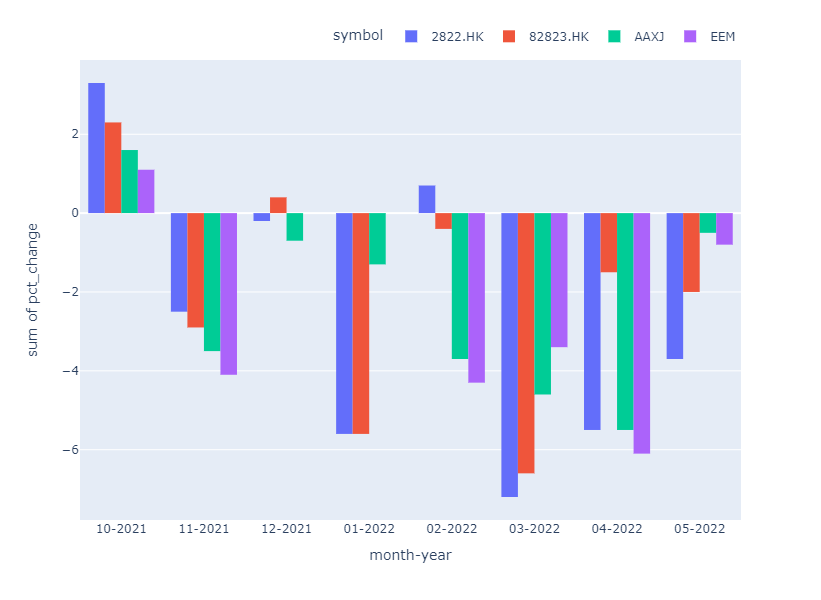

In [121]:
chart_title='pct_change'
fig = px.histogram(df_Monthly_Price, x="month-year", y="pct_change",
             color='symbol', barmode='group',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

# fig.update_layout(
#     autosize=True,
#     width=2000,
#     height=1000,)

fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")


In [122]:
df_Monthly_Price['is-gain']=df_Monthly_Price.apply(lambda x: 1 if x['pct_change']>0 else 0 ,axis=1)
df_Monthly_Price.head()

,symbol,month-year,pct_change,is-gain
0,2822.HK,10-2021,3.3,1
1,2822.HK,11-2021,-2.5,0
2,2822.HK,12-2021,-0.2,0
3,2822.HK,01-2022,-5.6,0
4,2822.HK,02-2022,0.7,1


In [123]:
df_Monthly_Count=df_Monthly_Price.groupby(['month-year','is-gain'],as_index=False).size()
df_Monthly_Count.rename(columns={'size':'count'},inplace=True)
df_Monthly_Count.tail()

,month-year,is-gain,count
5,05-2022,0,4
6,10-2021,1,4
7,11-2021,0,4
8,12-2021,0,3
9,12-2021,1,1


In [124]:
if timeframe=='M':
 df_Monthly_Count['month-year'] = pd.to_datetime(df_Monthly_Count['month-year'], format='%m-%Y')
elif timeframe=='W':
 df_Monthly_Count['month-year'] = pd.to_datetime(df_Monthly_Count['month-year'], format='%d-%m-%Y')   


df_Monthly_Count=df_Monthly_Count.sort_values(['month-year'])



if timeframe=='M':
 df_Monthly_Count['month-year']=df_Monthly_Count['month-year'].apply( lambda x: x.strftime('%m-%Y') )
elif timeframe=='W':
 df_Monthly_Count['month-year']=df_Monthly_Count['month-year'].apply( lambda x: x.strftime('%d-%m-%Y') )  
df_Monthly_Count

,month-year,is-gain,count
6,10-2021,1,4
7,11-2021,0,4
8,12-2021,0,3
9,12-2021,1,1
0,01-2022,0,4
1,02-2022,0,3
2,02-2022,1,1
3,03-2022,0,4
4,04-2022,0,4
5,05-2022,0,4


In [125]:
df_Monthly_Count=df_Monthly_Count.reset_index(drop=True)
df_Monthly_Count.reset_index()
df_Monthly_Count

,month-year,is-gain,count
0,10-2021,1,4
1,11-2021,0,4
2,12-2021,0,3
3,12-2021,1,1
4,01-2022,0,4
5,02-2022,0,3
6,02-2022,1,1
7,03-2022,0,4
8,04-2022,0,4
9,05-2022,0,4


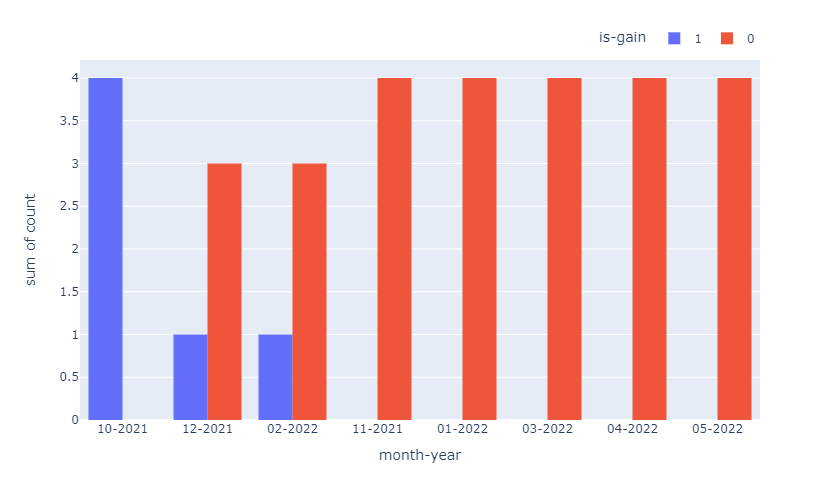

In [126]:
chart_title="gain-lose"

fig = px.histogram(df_Monthly_Count, x="month-year", y="count",
             color='is-gain', barmode='group',height=500)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")